<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Salary_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP on Salary Dataset

**About Dataset**<br>
A The dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources.A total of 6704 data points were collected.The dataset included fivevariables: age, experience, job role, and education level and salary

In [1]:
import pandas as pd

### Importing data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/salary dataset/Salary_Data.csv')

### Exploring the dataset

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.shape

(6704, 6)

In [5]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [6]:
data['Job Title'].nunique()

193

193 different types of Job here.

In [7]:
data['Years of Experience'].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5,  nan, 31. , 30. , 28. , 33. ,
       27. , 34. , 29. , 26. , 32. ])

In [8]:
numerical=[]
catagorical=[]
for i in data.columns:
  if data[i].dtypes == 'object':
    catagorical.append(i)
  else:
    numerical.append(i)

In [9]:
print("Numerical:",numerical)
print("Catagorical:",catagorical)

Numerical: ['Age', 'Years of Experience', 'Salary']
Catagorical: ['Gender', 'Education Level', 'Job Title']


### Basic EDA

- Check for null value
- check for duplicate values
- check distribution for numerical
- check value count and bar plot for catagorical

#### Numerical

In [10]:
data.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


Some missing values in every column.

In [11]:
data.duplicated().sum()

4912

In [12]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6699,True
6700,True
6701,True
6702,True


In [13]:
data[data['Age']== 26]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
38,26.0,Female,Bachelor's,Customer Success Rep,1.0,40000.0
64,26.0,Male,Bachelor's,Junior Accountant,1.0,35000.0
97,26.0,Male,Bachelor's,Junior Software Developer,1.0,35000.0
125,26.0,Male,Bachelor's,Junior Accountant,2.0,40000.0
...,...,...,...,...,...,...
6647,26.0,Female,High School,Sales Executive,1.0,35000.0
6661,26.0,Female,High School,Sales Associate,1.0,35000.0
6675,26.0,Female,High School,Sales Executive,1.0,35000.0
6689,26.0,Female,High School,Sales Associate,1.0,35000.0


It seems like this dataset have good amount of duplicate values.

<Axes: ylabel='Density'>

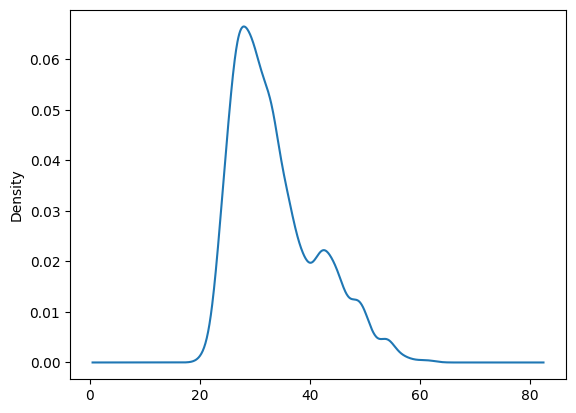

In [14]:
data['Age'].plot(kind='kde')

negatively skewed

<Axes: >

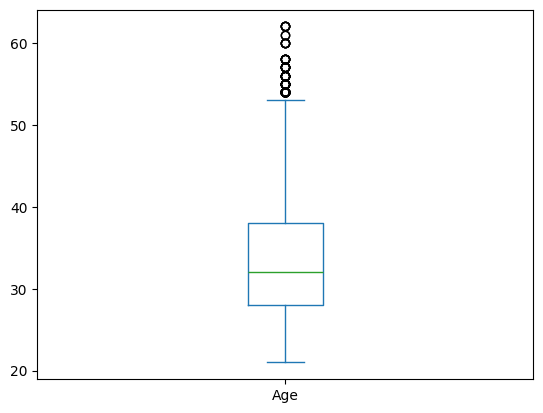

In [15]:
data['Age'].plot(kind='box')

there are outliers in age column.

<Axes: ylabel='Density'>

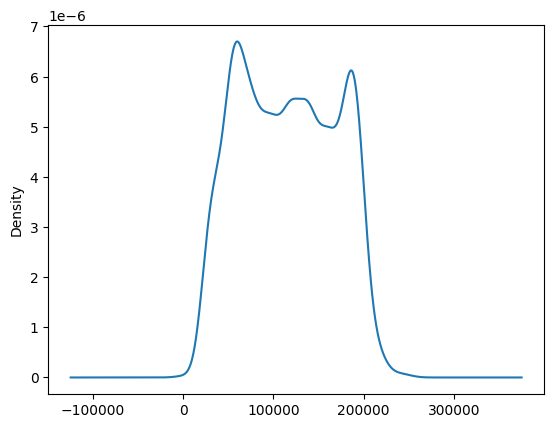

In [16]:
data['Salary'].plot(kind='kde')

<Axes: >

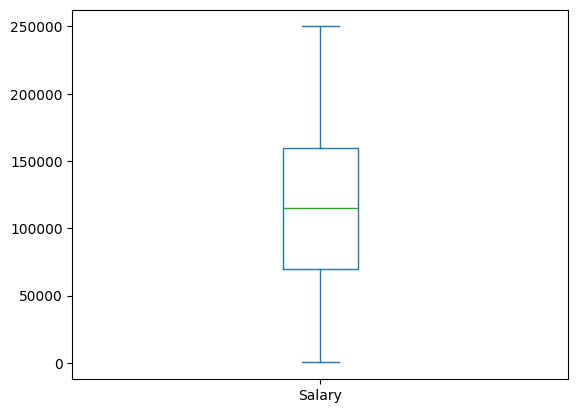

In [17]:
data['Salary'].plot(kind='box')

No outlier in the salary column

<Axes: ylabel='Density'>

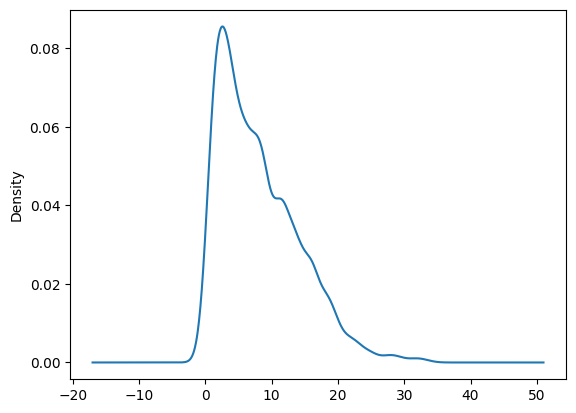

In [18]:
data['Years of Experience'].plot(kind='kde')

Negatively skewed

<Axes: >

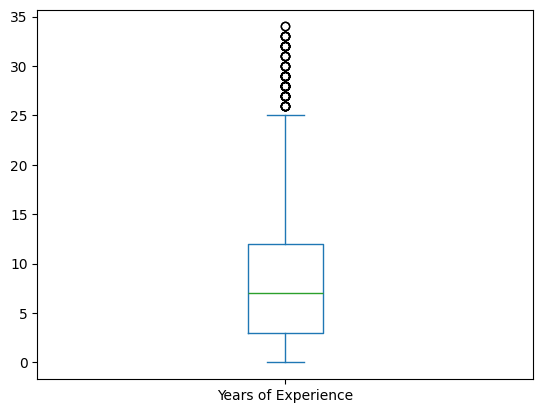

In [19]:
data['Years of Experience'].plot(kind='box')

Outliers above 25 years

Observing truth about outliers

In [20]:
data[data['Years of Experience']>25]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0
2392,52.0,Female,Master's Degree,Senior Software Engineer,28.0,186963.0
2396,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0
2398,58.0,Male,Master's Degree,Senior Software Engineer,27.0,190004.0
...,...,...,...,...,...,...
3076,52.0,Male,PhD,Software Engineer Manager,26.0,185982.0
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0
3120,54.0,Male,PhD,Software Engineer Manager,28.0,182013.0


In [21]:
data[(data['Years of Experience']>25) & (data['Age']<30)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [22]:
data[(data['Years of Experience']>25) & (data['Age']<45)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [23]:
data[data['Years of Experience']>25].describe()

,Age,Years of Experience,Salary
count,75.000000,75.000000,75.000000
mean,54.066667,29.280000,185481.333333
std,2.256123,2.263458,13749.042581
min,48.000000,26.000000,121450.000000
25%,52.000000,28.000000,185982.000000
50%,54.000000,29.000000,190543.000000
75%,55.000000,31.000000,191650.000000
max,60.000000,34.000000,197354.000000


This datapoints are not accually outliers , their mean age is 53, and mean years of experience is 29 . Which is acceptable

#### Catagorical

In [24]:
data['Gender'].value_counts()

,count
Gender,
Male,3674
Female,3014
Other,14


<Axes: ylabel='count'>

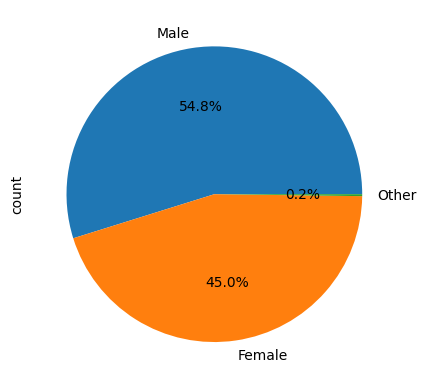

In [25]:
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [26]:
data['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


total 193 job titles

In [27]:
job_counts = data['Job Title'].value_counts()
filtered_data = data[data['Job Title'].isin(job_counts[job_counts == 1].index)]
filtered_data['Job Title'].value_counts()

,count
Job Title,
Director,1
Senior IT Project Manager,1
Junior Data Scientist,1
Senior Researcher,1
Senior Account Manager,1
...,...
Business Development Manager,1
IT Manager,1
UX Researcher,1


In [28]:
data['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


<Axes: xlabel='Education Level'>

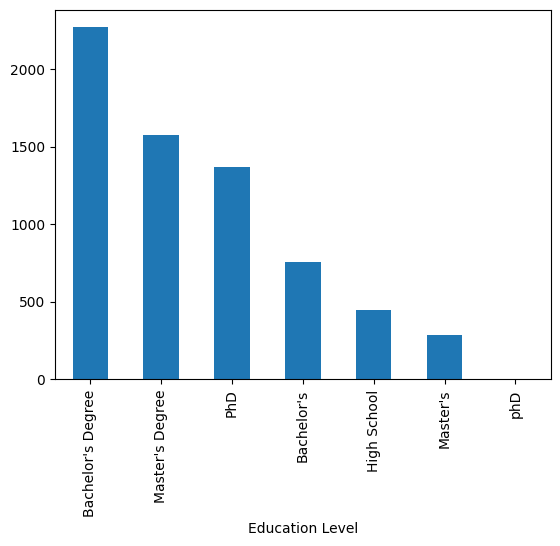

In [29]:
data['Education Level'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

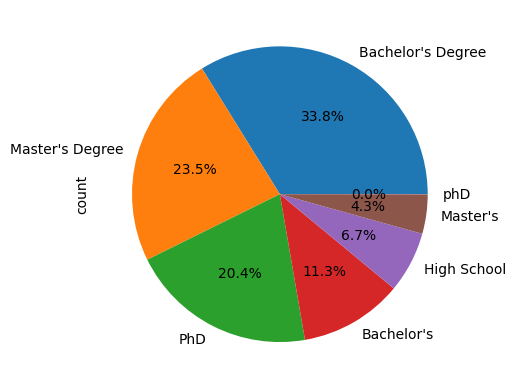

In [30]:
data['Education Level'].value_counts().plot(kind="pie",autopct='%1.1f%%')

### handeling nan values

In [31]:
data.dropna(inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lb = LabelEncoder()

In [34]:
data['Gender']= lb.fit_transform(data['Gender'])
data['Job Title']= lb.fit_transform(data['Job Title'])
data['Education Level']= lb.fit_transform(data['Education Level'])

In [35]:
data.head()
[22,1,3,176,2]

[22, 1, 3, 176, 2]

In [36]:
data['Job Title'].value_counts()

,count
Job Title,
175,518
20,453
176,376
18,363
158,318
...,...
0,1
48,1
169,1


Trasforming salary column for better model training

In [37]:
def salary(x):
  if x>0 and x<50000:
    return 0
  elif x>50000 and x<70000:
    return 1
  elif x>70000 and x<90000:
    return 2
  elif x>90000 and x<110000:
    return 3
  else:
    return 4

In [38]:
data['new_salary'] = data['Salary']
new_data = data.drop('Salary',axis=1)
data.drop('new_salary',axis=1,inplace=True)

In [39]:
data['Salary'].apply(salary).value_counts()

,count
Salary,
4,4176
1,759
0,686
2,548
3,529


In [40]:
data['Salary'] = data['Salary'].apply(salary)

In [41]:
data['Salary'].value_counts()

,count
Salary,
4,4176
1,759
0,686
2,548
3,529


Everything converted into numerical values.

We will train the model without normalizing data.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
# train test split
X = data.drop('Salary',axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print("X test shape",X_test.shape)
print("y test shape",y_test.shape)

X test shape (1340, 5)
y test shape (1340,)


In [45]:
print("X train shape",X_train.shape)
print("y train shape",y_train.shape)

X train shape (5358, 5)
y train shape (5358,)


In [46]:
model1 = MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter=750, activation='relu', random_state=42)

In [47]:
model1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=750, random_state=42)

In [48]:
y_pred = model1.predict(X_test)

In [49]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
print("Cofusion matrix\n",confusion_matrix(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

Accuracy Score: 83.80597014925372
Cofusion matrix
 [[116  25   0   0   2]
 [  2 119  15   1  19]
 [  0   1  87   5  11]
 [  0   4   9  63  42]
 [  7  39  23  12 738]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.81      0.87       143
           1       0.63      0.76      0.69       156
           2       0.65      0.84      0.73       104
           3       0.78      0.53      0.63       118
           4       0.91      0.90      0.90       819

    accuracy                           0.84      1340
   macro avg       0.78      0.77      0.77      1340
weighted avg       0.85      0.84      0.84      1340

MSE 0.6962686567164179


In [50]:
model2 = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=750, activation='tanh')


In [51]:
model2.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=750)

In [52]:
y_pred = model2.predict(X_test)

In [53]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 88.58208955223881


In [54]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
print("Cofusion matrix\n",confusion_matrix(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

Accuracy Score: 88.58208955223881
Cofusion matrix
 [[127  10   0   0   6]
 [  3 132   3   2  16]
 [  0   4  79   7  14]
 [  0   4   6  72  36]
 [  3  19   7  13 777]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.89      0.92       143
           1       0.78      0.85      0.81       156
           2       0.83      0.76      0.79       104
           3       0.77      0.61      0.68       118
           4       0.92      0.95      0.93       819

    accuracy                           0.89      1340
   macro avg       0.85      0.81      0.83      1340
weighted avg       0.88      0.89      0.88      1340

MSE 0.4843283582089552


In [55]:
y_pred = model1.predict([[22,0,1,175,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [56]:
if(y_pred[0]==0):
  print("Salary is less than 50k")
elif(y_pred[0]==1):
  print("Salary is 50000 to 70000")
elif (y_pred[0]==2):
  print("Salary is 70000 to 90000")
elif (y_pred[0]==3):
  print("Salary is 90000 to 110000")
else:
  print("Salary is more that 110000")

Salary is less than 50k


### This is a Regression problem because of continious values.

In [58]:
new_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,new_salary
0,32.0,1,0,175,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,144,15.0,150000.0
3,36.0,0,0,115,7.0,60000.0
4,52.0,1,3,25,20.0,200000.0


In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int64  
 2   Education Level      6698 non-null   int64  
 3   Job Title            6698 non-null   int64  
 4   Years of Experience  6698 non-null   float64
 5   new_salary           6698 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 366.3 KB


No missing value.

In [61]:
X=new_data.drop(columns="new_salary")
y = new_data["new_salary"]

In [62]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,175,5.0
1,28.0,0,3,18,3.0
2,45.0,1,5,144,15.0
3,36.0,0,0,115,7.0
4,52.0,1,3,25,20.0
...,...,...,...,...,...
6699,49.0,0,5,33,20.0
6700,32.0,1,2,115,3.0
6701,30.0,0,1,41,4.0
6702,46.0,1,4,96,14.0


In [63]:
y

,new_salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6699,200000.0
6700,50000.0
6701,55000.0
6702,140000.0


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5358, 5), (1340, 5), (5358,), (1340,))

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()


In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
X_train_scaled

array([[ 0.7073339 ,  0.89507087,  0.79000963,  0.68633278,  0.3157382 ],
       [ 0.57565345, -1.09736357,  0.79000963, -1.57390402,  0.3157382 ],
       [ 0.1806121 , -1.09736357,  1.34001893,  0.30962665,  0.64806809],
       ...,
       [-1.1361924 ,  0.89507087, -0.86001828, -0.13557151, -1.17974629],
       [-0.8728315 ,  0.89507087, -0.86001828, -0.13557151, -1.17974629],
       [-1.1361924 , -1.09736357, -1.41002758, -1.31705893, -1.01358135]])

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lin_reg = LinearRegression()

In [73]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [74]:
y_pred = lin_reg.predict(X_test_scaled)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [79]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)

MAE: 24024.935439841025
MSE: 926443019.1550828
R2: 0.675098629018035


In [82]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [87]:
temp = [[22,3,1,175,0]]
temp_new = scaler.transform(temp)
y_temp = xgb_reg.predict(temp_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [88]:
y_temp

array([61626.707], dtype=float32)